In [145]:
import torch
from d2l import torch as d2l

In [146]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [147]:
x.requires_grad_(True)
x.grad

In [148]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [149]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [150]:
x.grad == 4 * x

tensor([True, True, True, True])

In [151]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [152]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [153]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad

tensor([0., 1., 4., 9.])

In [154]:
u

tensor([0., 1., 4., 9.])

In [155]:
x.grad.zero_()
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [156]:
z = y.sum()

In [183]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b *= 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    
    return c

In [184]:
a = torch.ones(size=(4, 4), requires_grad=True)
d = f(a)
d.sum().backward()

In [185]:
a.grad

tensor([[256., 256., 256., 256.],
        [256., 256., 256., 256.],
        [256., 256., 256., 256.],
        [256., 256., 256., 256.]])

In [160]:
d / a

tensor([[51199.9961, 51200.0000, 51200.0039, 51200.0000],
        [51200.0000, 51200.0000, 51200.0000, 51200.0000],
        [51200.0000, 51200.0000, 51200.0000, 51200.0000],
        [51200.0000, 51200.0000, 51200.0039, 51200.0000]],
       grad_fn=<DivBackward0>)

In [161]:
a.grad.zero_()

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [162]:
x = torch.arange(4.0)
x.requires_grad_(True)

tensor([0., 1., 2., 3.], requires_grad=True)

In [163]:
y = 2 * torch.dot(x, x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [164]:
def f(x):
    return torch.sin(x)

In [165]:
x = torch.arange(-2*torch.pi, 2*torch.pi, 0.1, requires_grad=True)
y = f(x)

In [166]:
y.sum().backward()


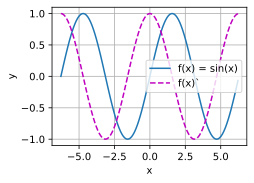

In [167]:
d2l.plot(x.detach().numpy(), [f(x).detach().numpy(), x.grad], 'x', 'y', legend=['f(x) = sin(x)', 'f(x)`'])

In [217]:
def f(a):
    b = a * 2
    while torch.sqrt(torch.sum(b * b)) < 1000:
        b *= 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    
    return c

In [218]:
a = torch.ones(size=(4, 4), requires_grad=True)
d = f(a)
d.sum().backward()

In [219]:
a.grad

tensor([[256., 256., 256., 256.],
        [256., 256., 256., 256.],
        [256., 256., 256., 256.],
        [256., 256., 256., 256.]])

In [216]:
x = torch.ones((4, 4))
torch.sqrt(torch.sum(x*x))

tensor(4.)

In [215]:
x.norm()

tensor(4.)